# Handwritten Digit recognition using CNN

# import the libararies 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Preprocessing data

In [2]:
num_classes=10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Create the model

In [3]:
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

C:\Users\tulas\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train the model

In [4]:
hist=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - accuracy: 0.1321 - loss: 2.2897 - val_accuracy: 0.3393 - val_loss: 2.2437
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.2471 - loss: 2.2356 - val_accuracy: 0.5487 - val_loss: 2.1721
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.3814 - loss: 2.1645 - val_accuracy: 0.6464 - val_loss: 2.0694
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.4923 - loss: 2.0610 - val_accuracy: 0.7041 - val_loss: 1.9194
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.5668 - loss: 1.9138 - val_accuracy: 0.7479 - val_loss: 1.7108
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.6208 - loss: 1.7106 - val_accuracy: 0.7758 - val_loss: 1.4552
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.6550 - loss: 1.4797 - val_accuracy: 0.7962 - val_loss: 1.1992
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.6802 - loss: 1.2688 - 

The model has successfully trained
Saving the model as mnist.h5


# Evaluate the model

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7295889854431152
Test accuracy: 0.8410000205039978


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,142,816 (27.25 MB)

 Trainable params: 2,380,938 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,761,878 (18.17 MB)

#  Predict digits

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


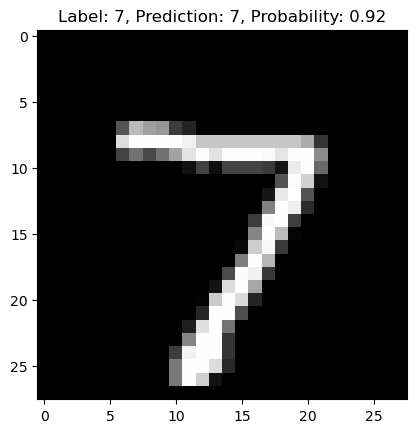

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


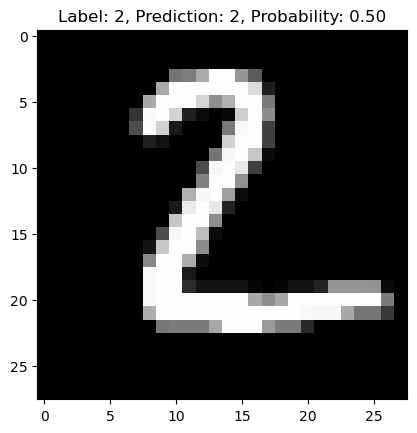

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


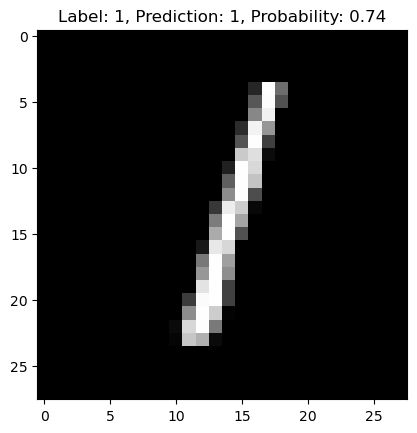

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


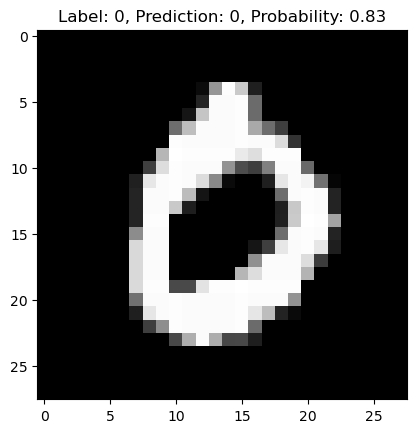

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


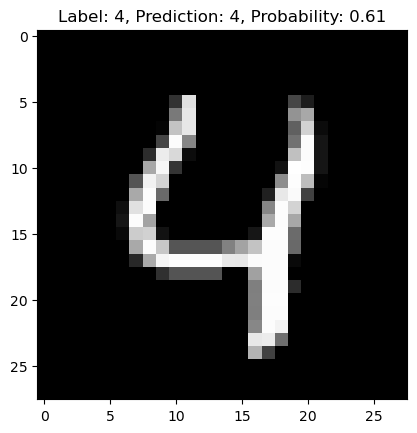

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


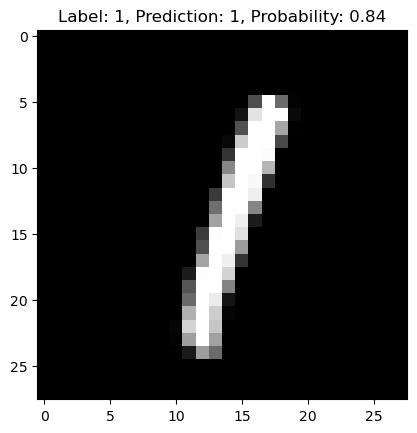

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


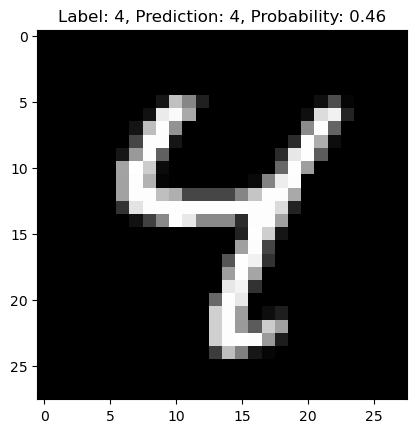

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


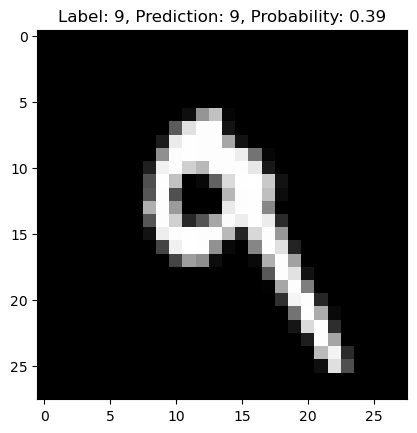

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


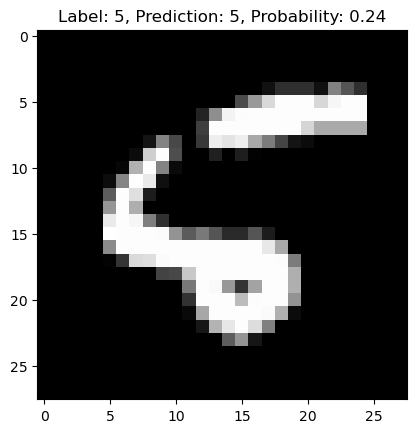

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


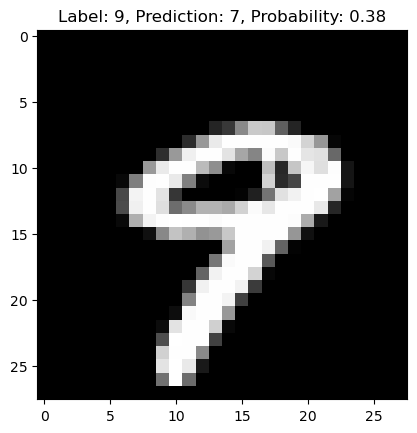

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('mnist.h5')

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = np.expand_dims(x_test, -1) / 255.0  # Normalize and add channel dimension

# Test the model with some test images
for i in range(10):
    img = x_test[i]
    label = y_test[i]
    img = np.expand_dims(img, 0)  # Add batch dimension
    prediction = model.predict(img)[0]
    predicted_class = np.argmax(prediction)
    probability = np.max(prediction)
    
    # Plot the image and prediction
    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.title(f'Label: {label}, Prediction: {predicted_class}, Probability: {probability:.2f}')
    plt.show()


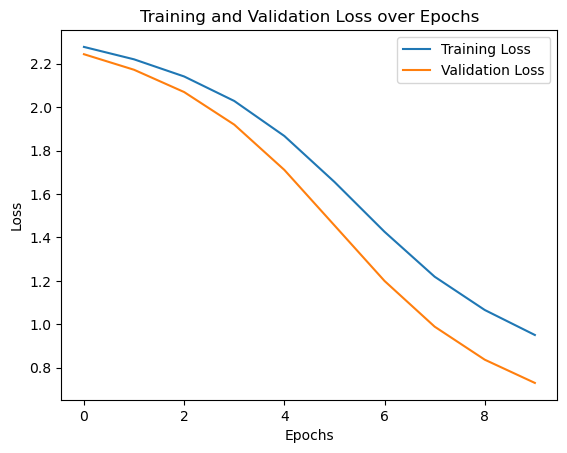

In [9]:
# Plot both validation loss and training loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Improve the model accuracy version 1 with 20 epochs

In [10]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [11]:
num_classes=10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
batch_size = 128
num_classes = 10
epochs = 20
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes, activation='softmax'))
model_2.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

C:\Users\tulas\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
hist_2=model_2.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model_2.save('mnist_2.h5')
print("Saving the model as mnist_2.h5")

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 72ms/step - accuracy: 0.1402 - loss: 2.2940 - val_accuracy: 0.3588 - val_loss: 2.2581
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.2637 - loss: 2.2525 - val_accuracy: 0.5767 - val_loss: 2.2044
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.3840 - loss: 2.2010 - val_accuracy: 0.6580 - val_loss: 2.1307
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.4824 - loss: 2.1261 - val_accuracy: 0.7085 - val_loss: 2.0244
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.5504 - loss: 2.0185 - val_accuracy: 0.7436 - val_loss: 1.8695
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.6031 - loss: 1.8627 - val_accuracy: 0.7671 - val_loss: 1.6541
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.6393 - loss: 1.6573 - val_accuracy: 0.7897 - val_loss: 1.3955
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.6694 - loss: 1.4286 - 

The model has successfully trained
Saving the model as mnist_2.h5


In [14]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.41222113370895386
Test accuracy: 0.8899000287055969


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


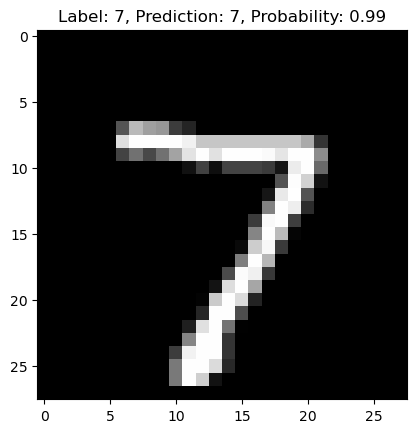

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


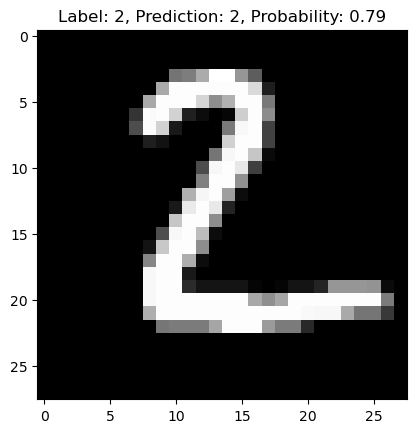

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


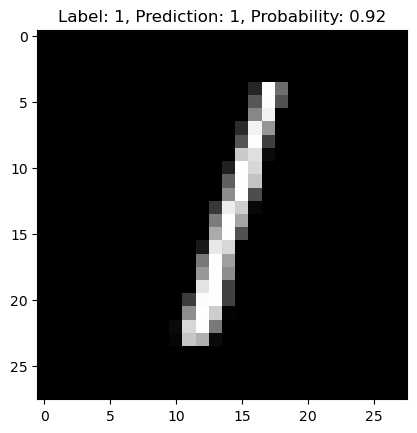

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


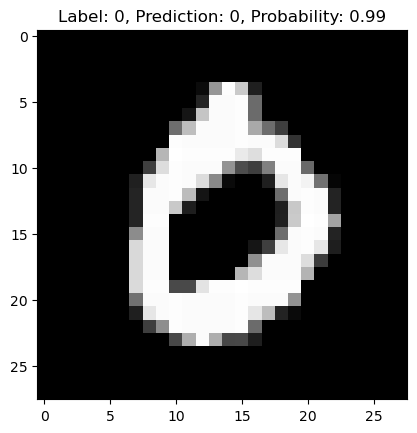

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


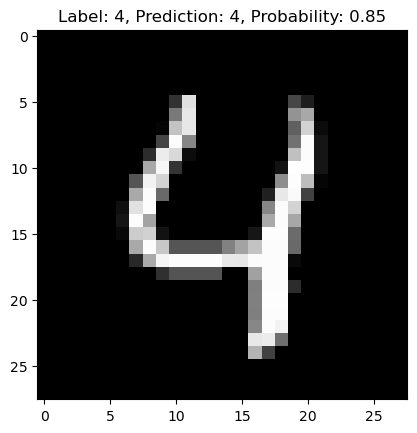

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


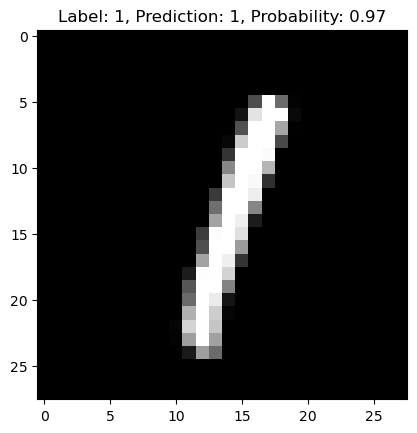

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


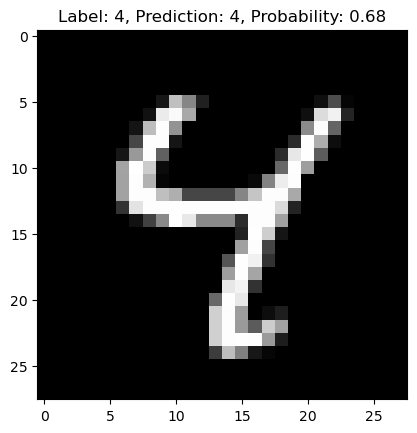

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


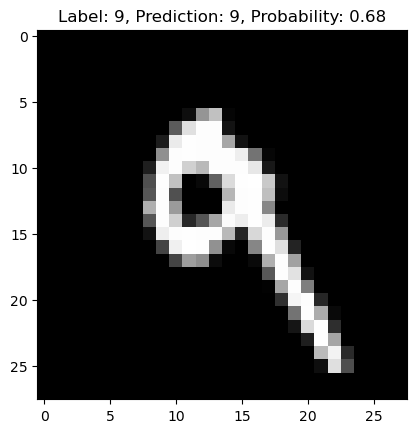

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


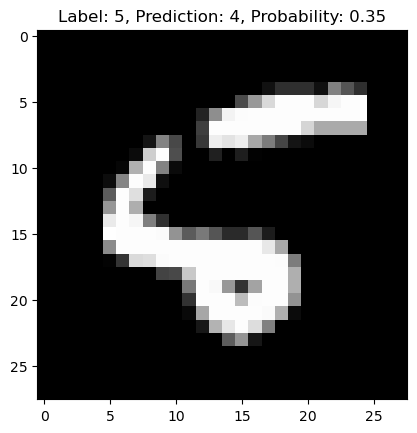

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


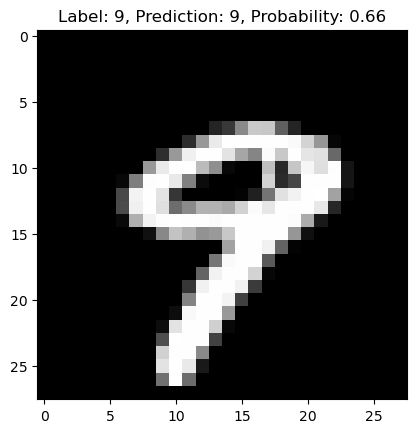

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('mnist_2.h5')

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = np.expand_dims(x_test, -1) / 255.0  # Normalize and add channel dimension

# Test the model with some test images
for i in range(10):
    img = x_test[i]
    label = y_test[i]
    img = np.expand_dims(img, 0)  # Add batch dimension
    prediction = model.predict(img)[0]
    predicted_class = np.argmax(prediction)
    probability = np.max(prediction)
    
    # Plot the image and prediction
    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.title(f'Label: {label}, Prediction: {predicted_class}, Probability: {probability:.2f}')
    plt.show()


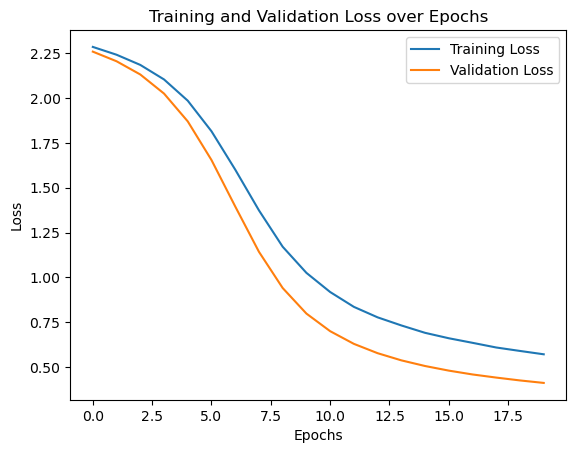

In [24]:
# Plot both validation loss and training loss
plt.plot(hist_2.history['loss'], label='Training Loss')
plt.plot(hist_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Improve the model accuracy version 2 with 30 epochs

In [17]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [18]:
num_classes=10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [19]:
batch_size = 128
num_classes = 10
epochs = 30
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes, activation='softmax'))
model_3.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [20]:
hist_3=model_3.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model_3.save('mnist_3.h5')
print("Saving the model as mnist_3.h5")

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 71ms/step - accuracy: 0.1214 - loss: 2.2934 - val_accuracy: 0.3111 - val_loss: 2.2470
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.2398 - loss: 2.2398 - val_accuracy: 0.5601 - val_loss: 2.1777
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.3737 - loss: 2.1714 - val_accuracy: 0.6552 - val_loss: 2.0824
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.4856 - loss: 2.0754 - val_accuracy: 0.7012 - val_loss: 1.9435
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.5595 - loss: 1.9379 - val_accuracy: 0.7343 - val_loss: 1.7495
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.6155 - loss: 1.7506 - val_accuracy: 0.7653 - val_loss: 1.5048
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.6534 - loss: 1.5283 - val_accuracy: 0.7926 - val_loss: 1.2457
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.6813 - loss: 1.3093 - 

The model has successfully trained
Saving the model as mnist_3.h5


In [21]:
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3220890760421753
Test accuracy: 0.9104999899864197


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


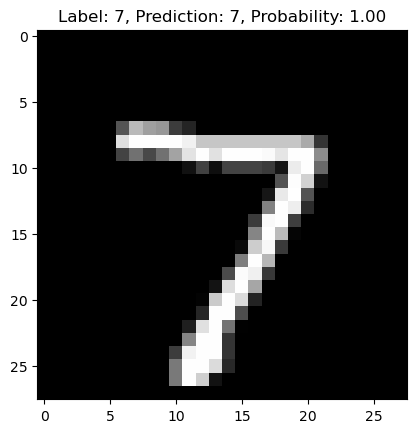

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


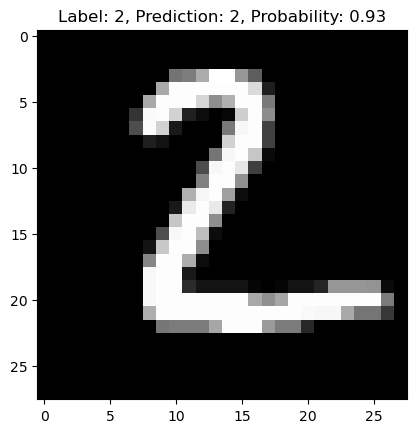

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


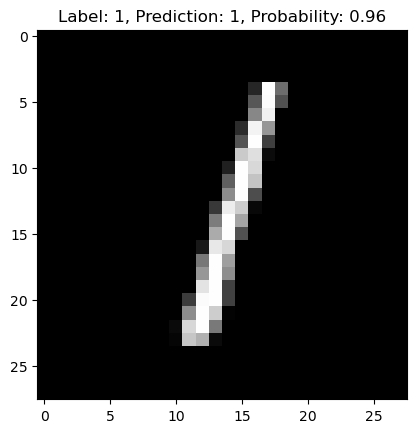

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


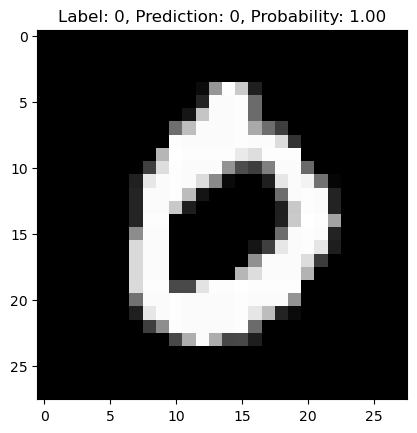

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


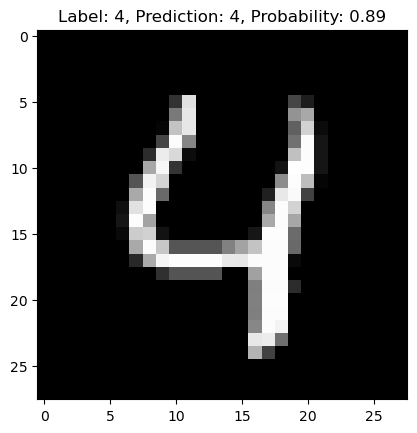

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


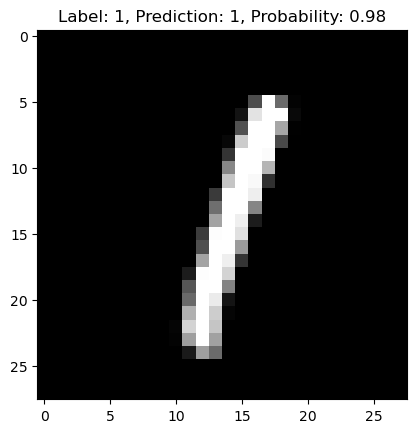

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


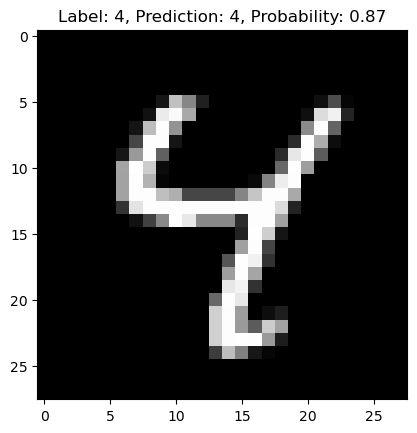

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


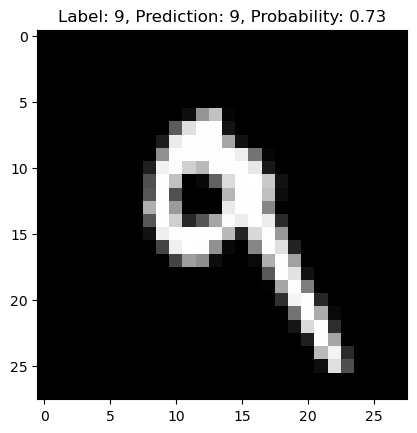

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


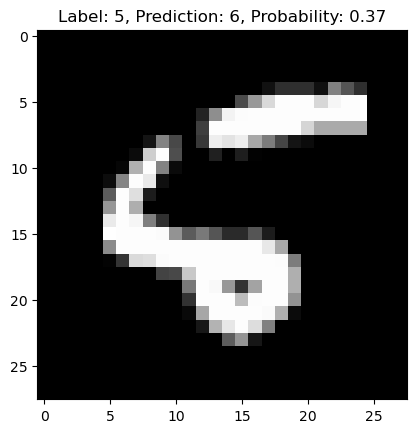

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


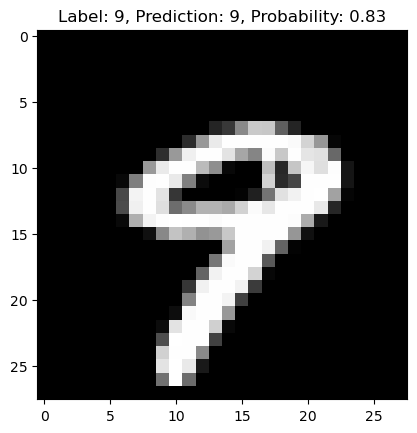

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('mnist_3.h5')

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = np.expand_dims(x_test, -1) / 255.0  # Normalize and add channel dimension

# Test the model with some test images
for i in range(10):
    img = x_test[i]
    label = y_test[i]
    img = np.expand_dims(img, 0)  # Add batch dimension
    prediction = model.predict(img)[0]
    predicted_class = np.argmax(prediction)
    probability = np.max(prediction)
    
    # Plot the image and prediction
    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.title(f'Label: {label}, Prediction: {predicted_class}, Probability: {probability:.2f}')
    plt.show()


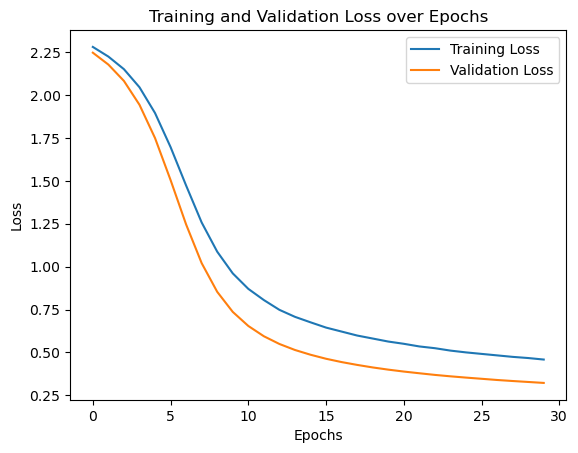

In [25]:
# Plot both validation loss and training loss
plt.plot(hist_3.history['loss'], label='Training Loss')
plt.plot(hist_3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Improve the model accuracy version 3 with 50 epochs

In [26]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [27]:
num_classes=10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [28]:
batch_size = 128
num_classes = 10
epochs = 50
model_4 = Sequential()
model_4.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model_4.add(Conv2D(64, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))
model_4.add(Flatten())
model_4.add(Dense(256, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes, activation='softmax'))
model_4.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [29]:
hist_4=model_4.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model_4.save('mnist_4.h5')
print("Saving the model as mnist_4.h5")

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 71ms/step - accuracy: 0.1370 - loss: 2.2921 - val_accuracy: 0.4067 - val_loss: 2.2393
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.2772 - loss: 2.2308 - val_accuracy: 0.5638 - val_loss: 2.1585
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.4018 - loss: 2.1518 - val_accuracy: 0.6588 - val_loss: 2.0460
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.5030 - loss: 2.0411 - val_accuracy: 0.7139 - val_loss: 1.8861
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.5770 - loss: 1.8784 - val_accuracy: 0.7484 - val_loss: 1.6658
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.6273 - loss: 1.6673 - val_accuracy: 0.7789 - val_loss: 1.4041
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.6611 - loss: 1.4399 - val_accuracy: 0.7992 - val_loss: 1.1538
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.6909 - loss: 1.2286 - 

The model has successfully trained
Saving the model as mnist_4.h5


In [30]:
score = model_4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25969815254211426
Test accuracy: 0.9243000149726868


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


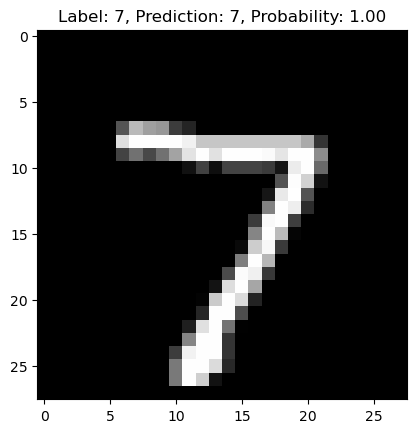

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


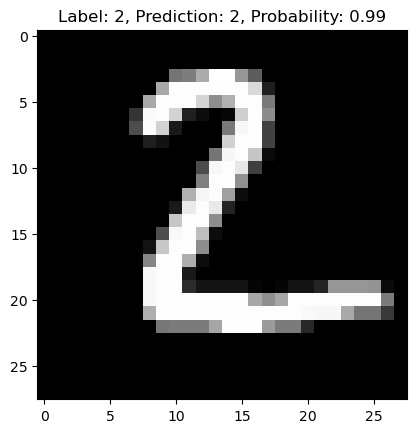

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


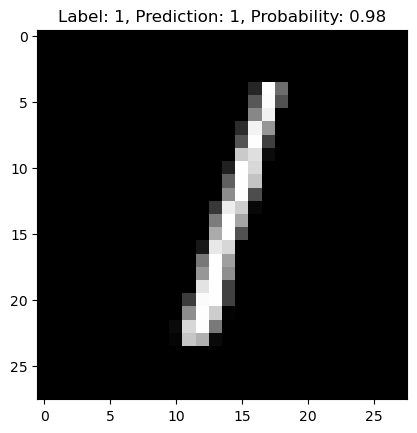

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


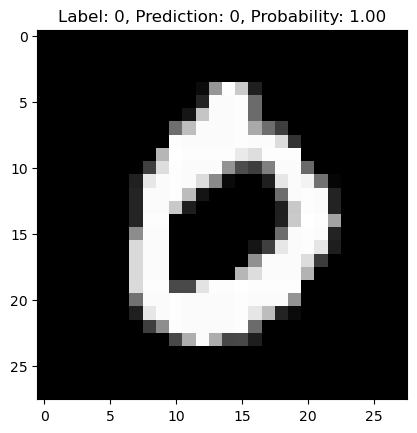

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


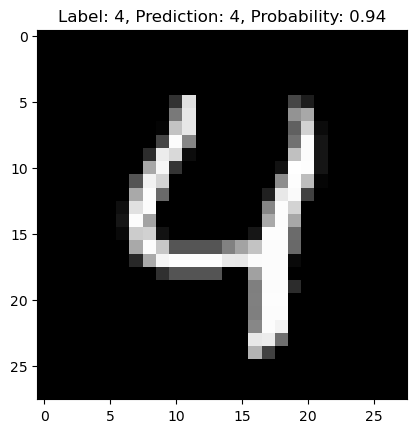

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


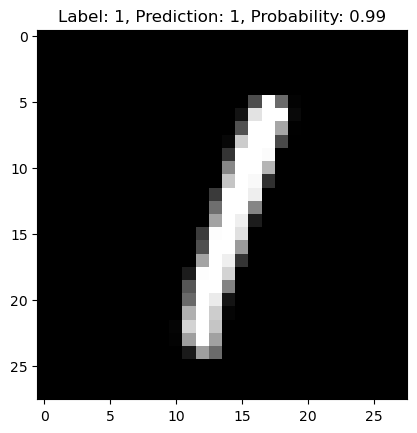

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


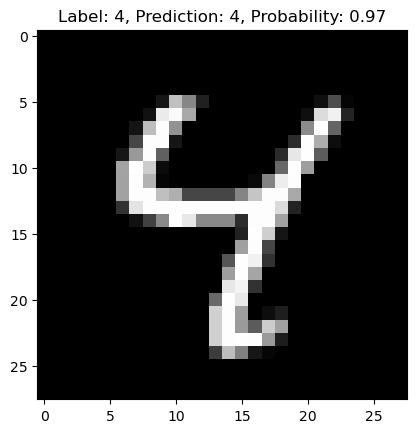

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


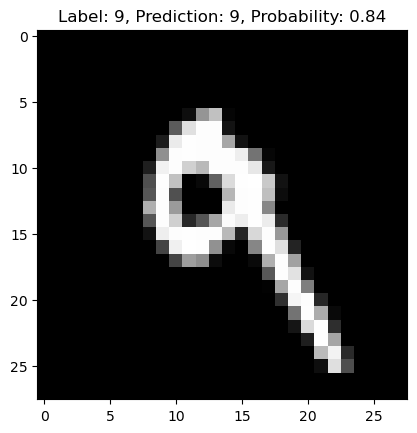

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


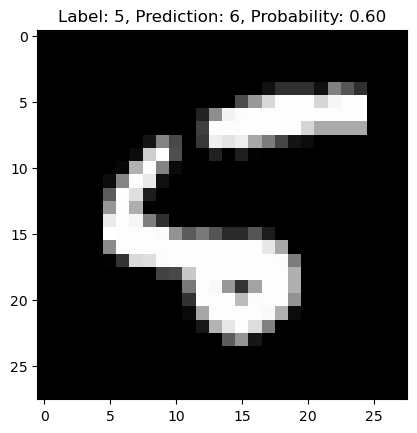

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


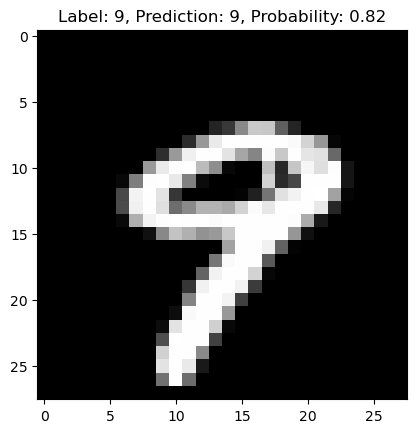

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('mnist_4.h5')

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = np.expand_dims(x_test, -1) / 255.0  # Normalize and add channel dimension

# Test the model with some test images
for i in range(10):
    img = x_test[i]
    label = y_test[i]
    img = np.expand_dims(img, 0)  # Add batch dimension
    prediction = model.predict(img)[0]
    predicted_class = np.argmax(prediction)
    probability = np.max(prediction)
    
    # Plot the image and prediction
    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.title(f'Label: {label}, Prediction: {predicted_class}, Probability: {probability:.2f}')
    plt.show()


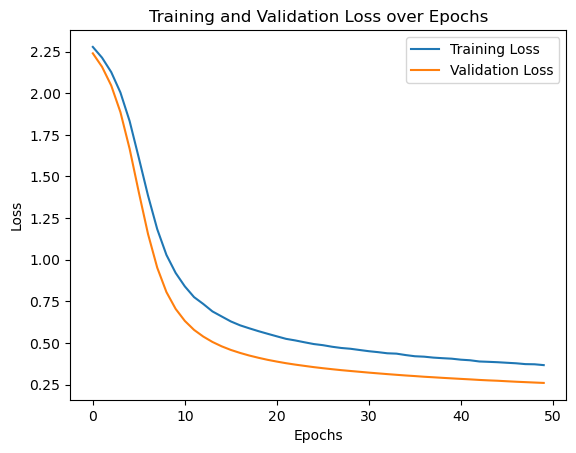

In [33]:
# Plot both validation loss and training loss
plt.plot(hist_4.history['loss'], label='Training Loss')
plt.plot(hist_4.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()